## Task 1: Exploratory Data Analysis (EDA):


In [ ]:
# Data Manipulation
import numpy as np 
import pandas as pd 

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt



# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('expand_frame_repr', False)

import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
# Load the dataset 
df = pd.read_csv('wine.csv') 
# Display the first few rows 
print(df.head())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


## Basic Data Exploration

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [11]:
print(df.head())


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [6]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


In [8]:
#Generate descriptive statistics for numerical columns:
print(df.describe())


             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

Histograms: To visualize the frequency distribution of each feature.

Box Plots: To identify outliers and understand the spread of the data.

Density Plots: To visualize the data distribution more smoothly.

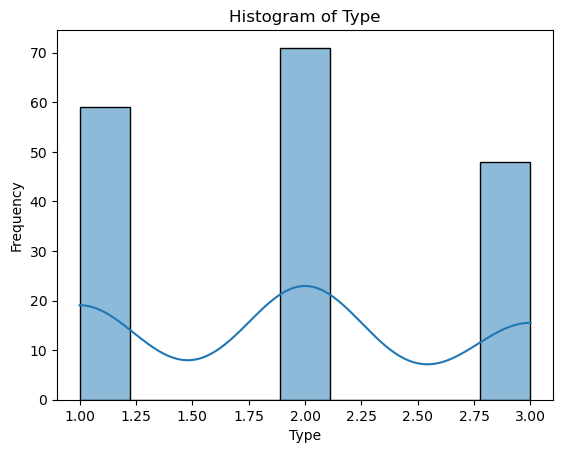

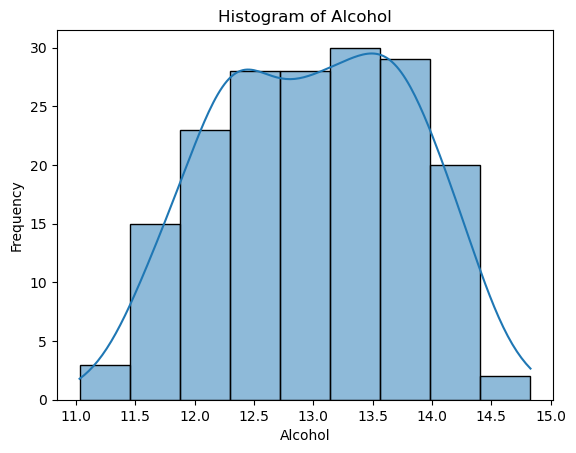

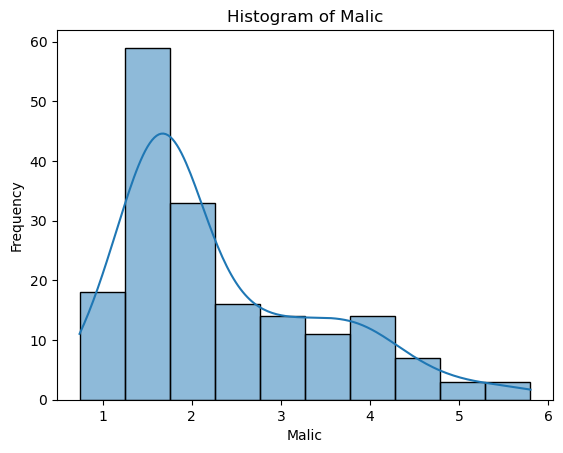

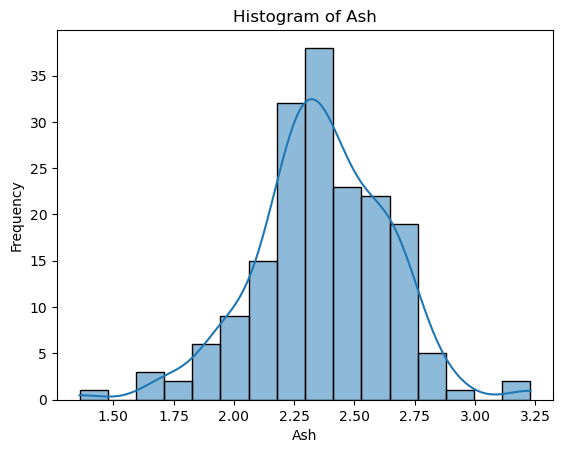

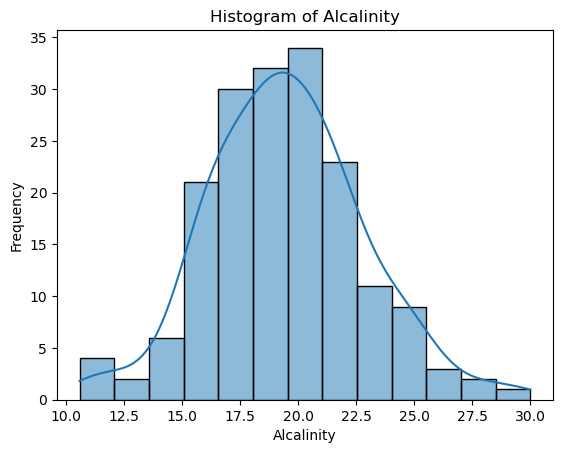

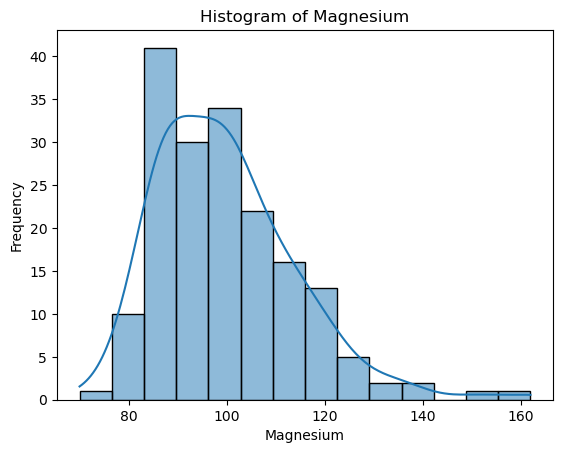

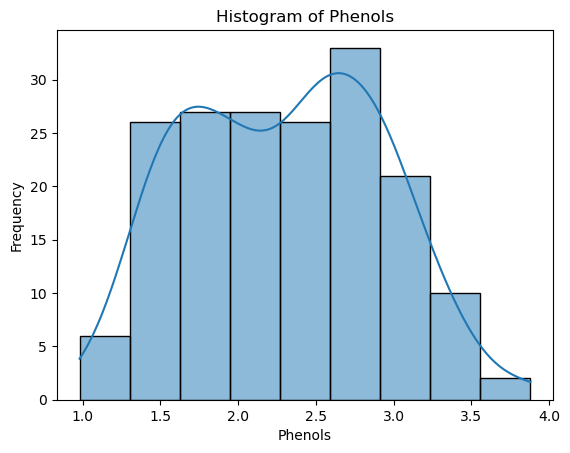

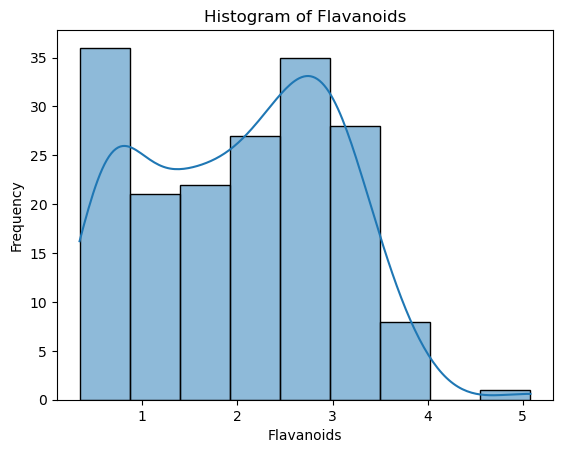

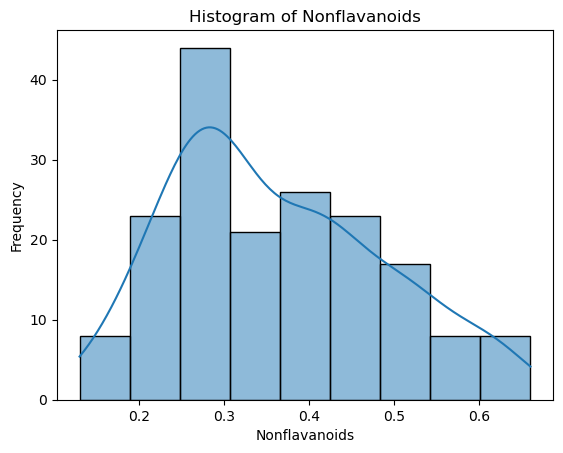

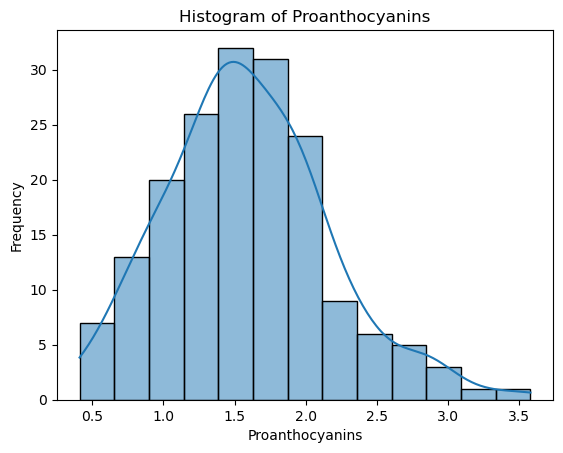

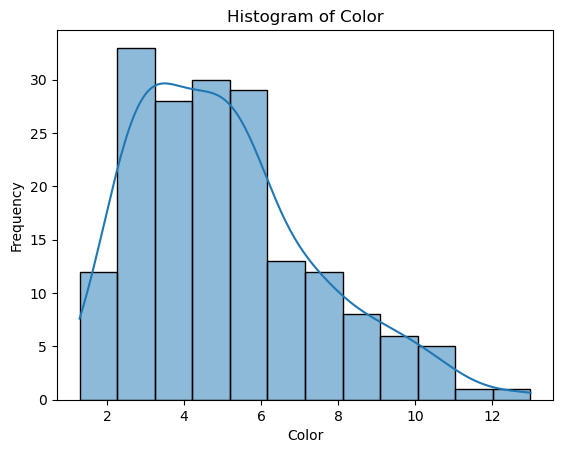

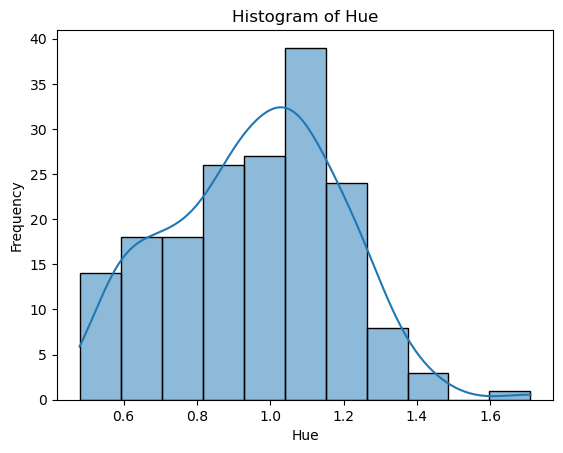

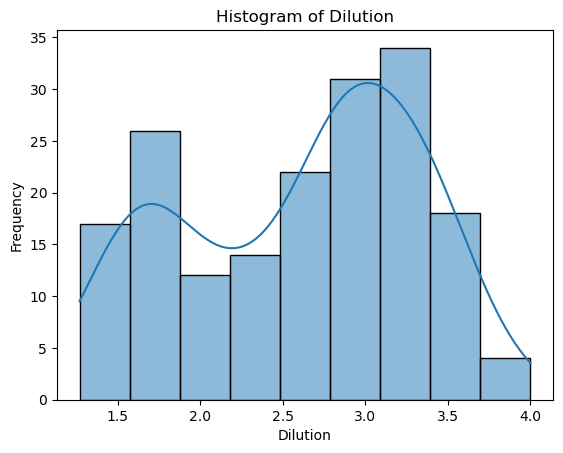

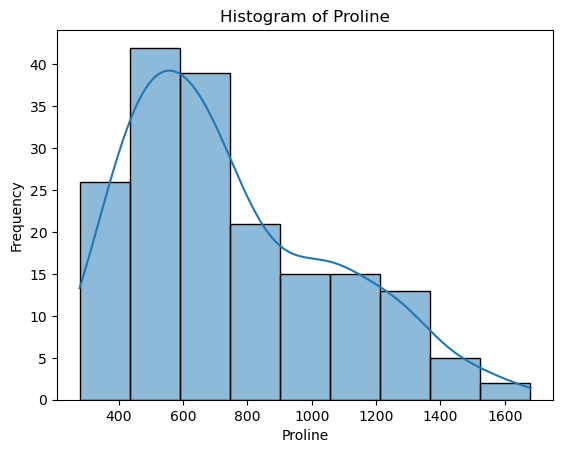

In [13]:
# Histograms for numerical columns 
numerical_columns = df.select_dtypes(include='number').columns.tolist() 
for column in numerical_columns: 
    plt.figure() 
    sns.histplot(df[column], kde=True) 
    plt.title(f'Histogram of {column}') 
    plt.xlabel(column) 
    plt.ylabel('Frequency') 
    plt.show()

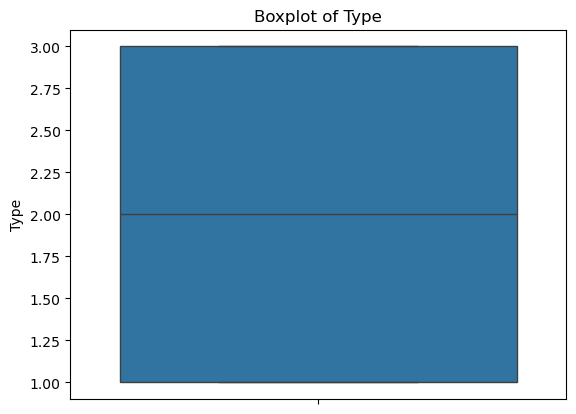

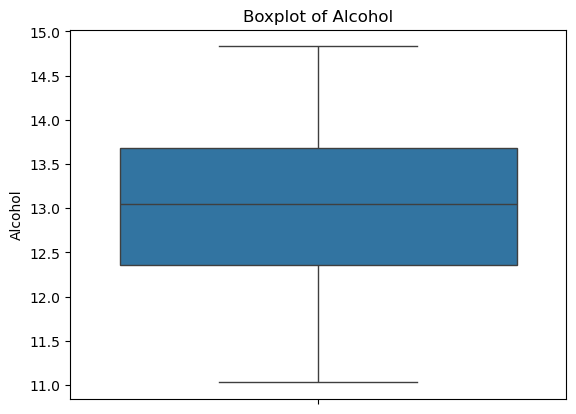

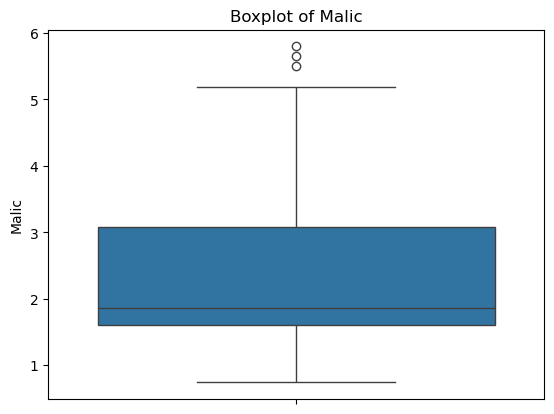

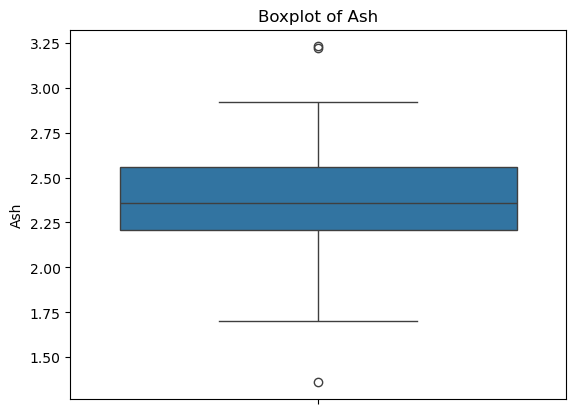

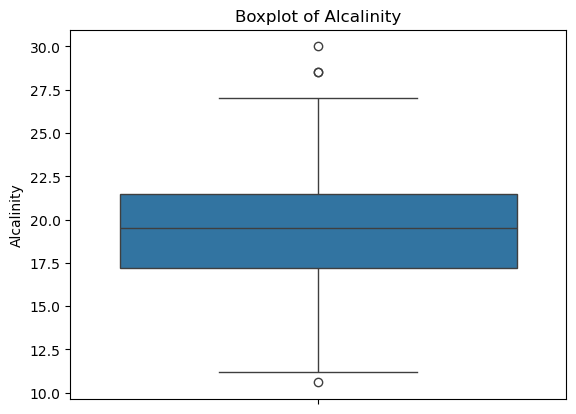

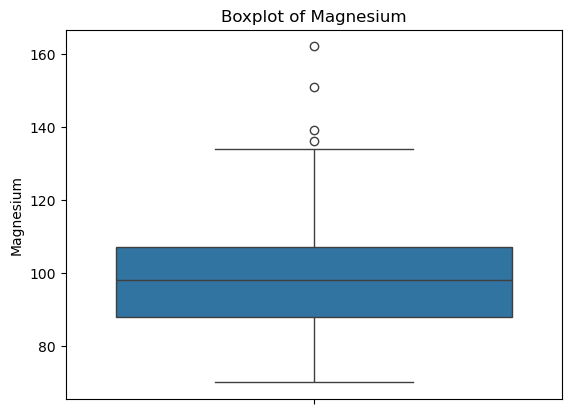

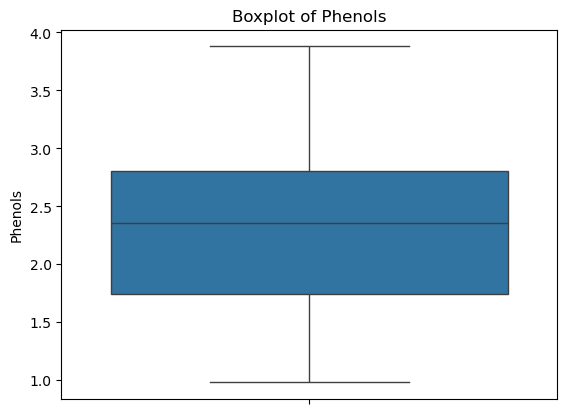

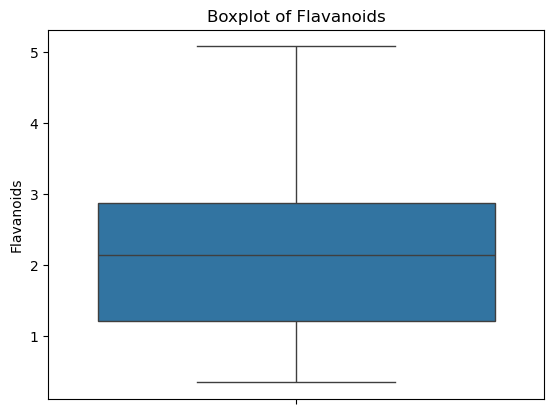

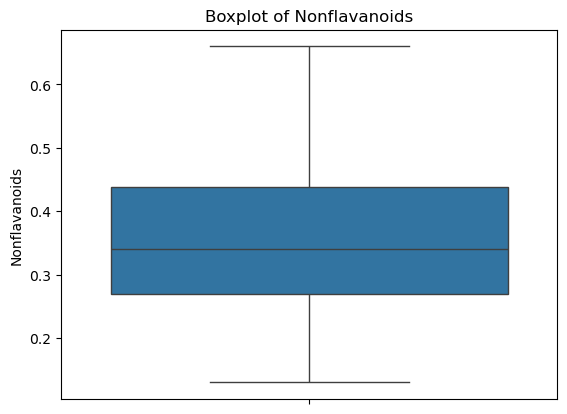

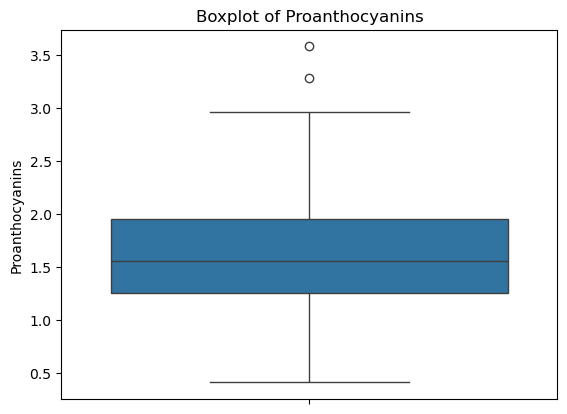

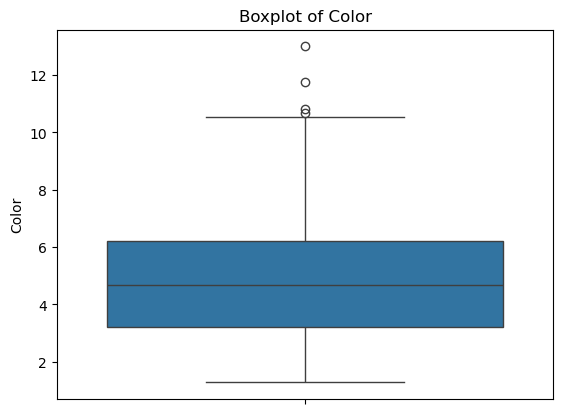

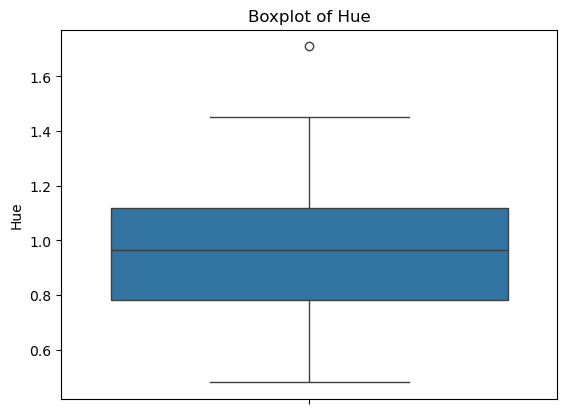

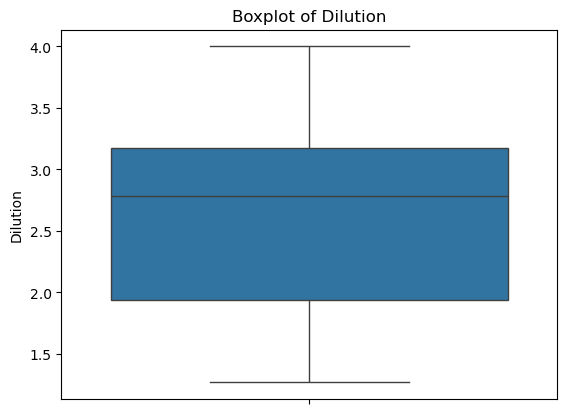

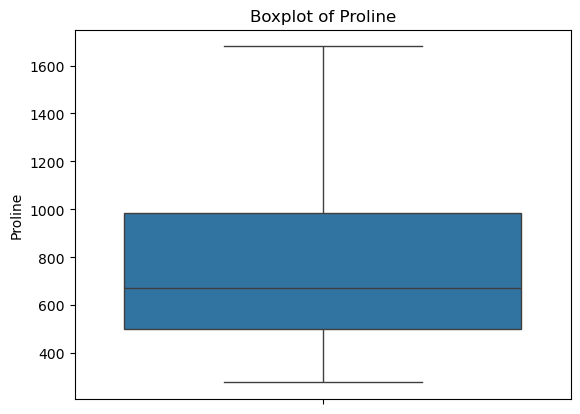

In [14]:
# Boxplots for numerical columns
for column in numerical_columns:
    plt.figure()
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()


C:\Users\vijay\AppData\Local\Temp\ipykernel_9300\3802976700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


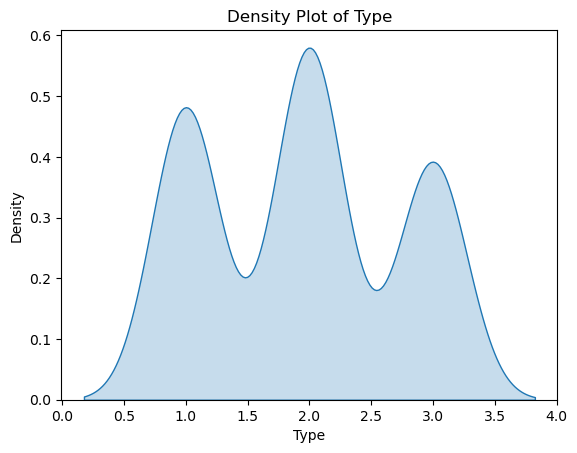

C:\Users\vijay\AppData\Local\Temp\ipykernel_9300\3802976700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


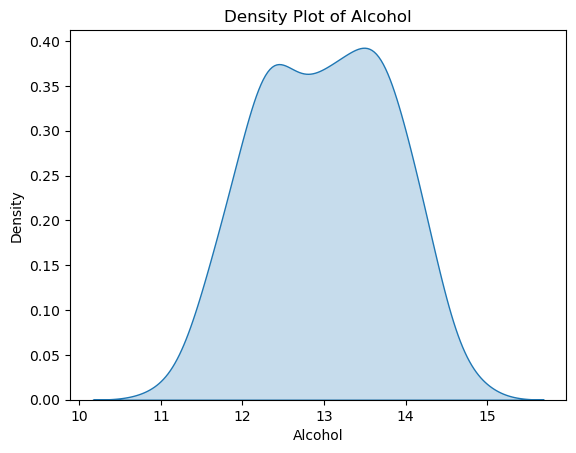

C:\Users\vijay\AppData\Local\Temp\ipykernel_9300\3802976700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


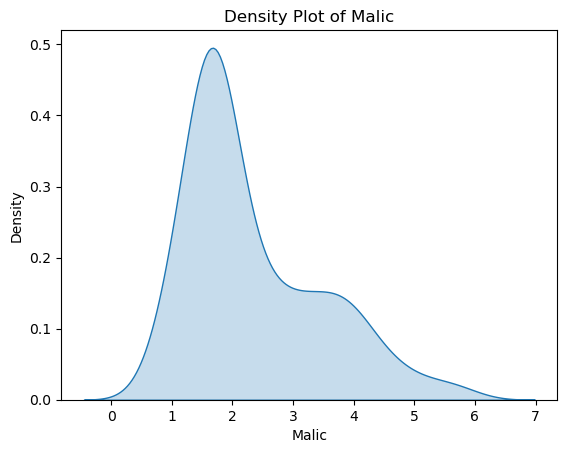

C:\Users\vijay\AppData\Local\Temp\ipykernel_9300\3802976700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


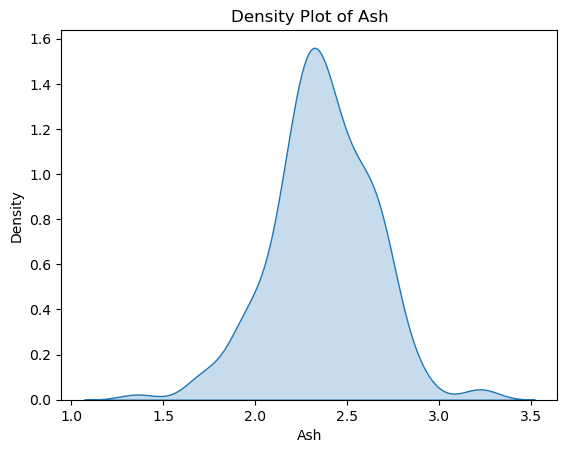

C:\Users\vijay\AppData\Local\Temp\ipykernel_9300\3802976700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


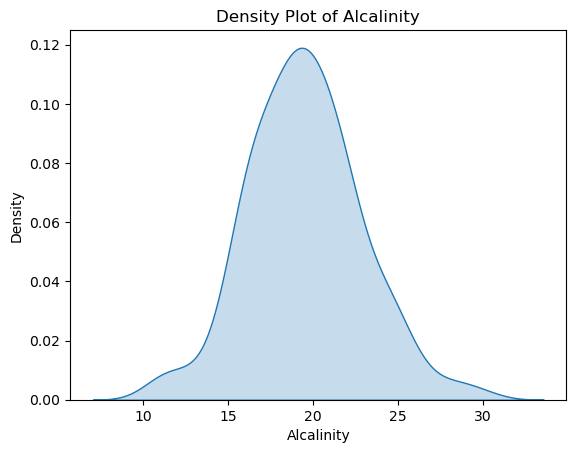

C:\Users\vijay\AppData\Local\Temp\ipykernel_9300\3802976700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


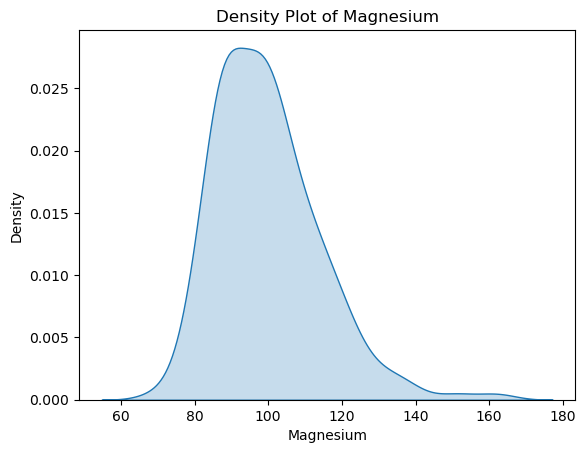

C:\Users\vijay\AppData\Local\Temp\ipykernel_9300\3802976700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


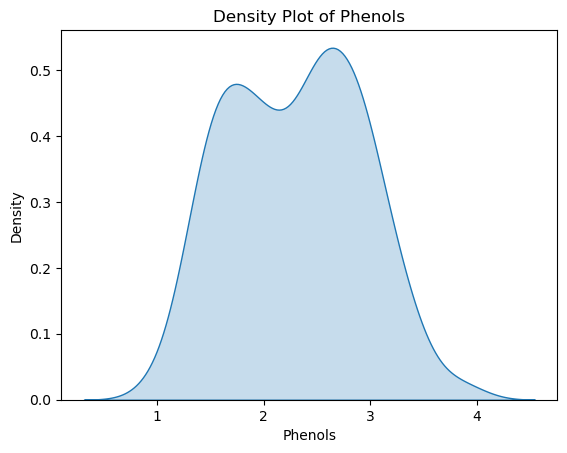

C:\Users\vijay\AppData\Local\Temp\ipykernel_9300\3802976700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


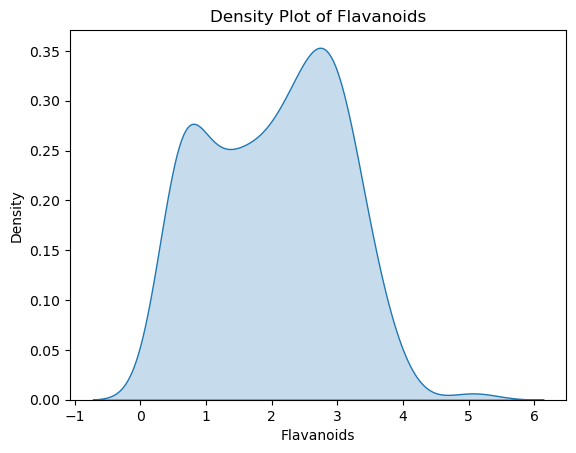

C:\Users\vijay\AppData\Local\Temp\ipykernel_9300\3802976700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


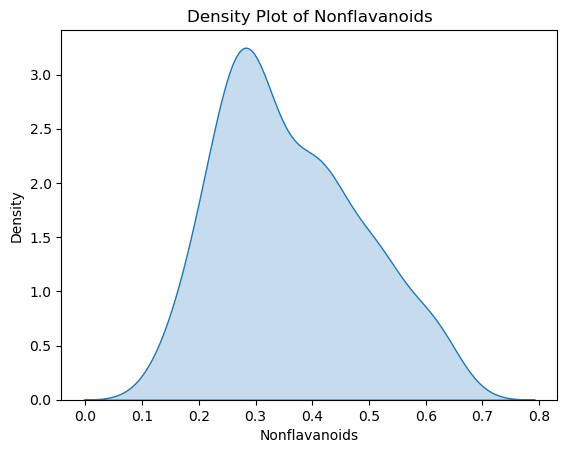

C:\Users\vijay\AppData\Local\Temp\ipykernel_9300\3802976700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


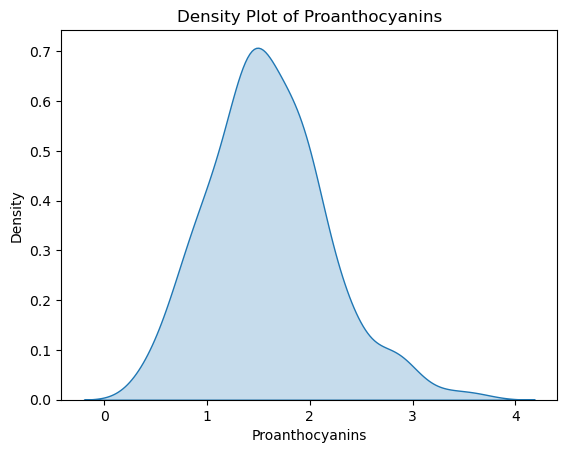

C:\Users\vijay\AppData\Local\Temp\ipykernel_9300\3802976700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


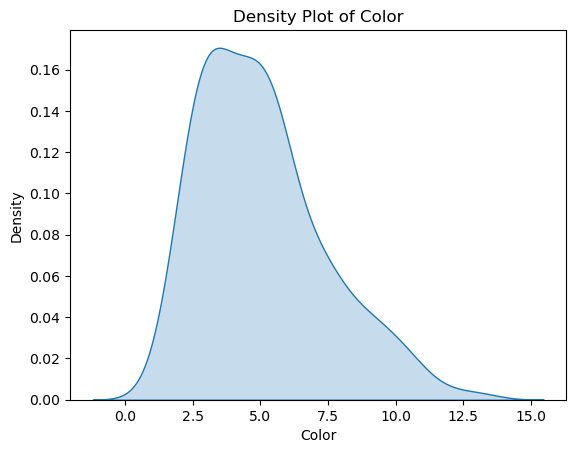

C:\Users\vijay\AppData\Local\Temp\ipykernel_9300\3802976700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


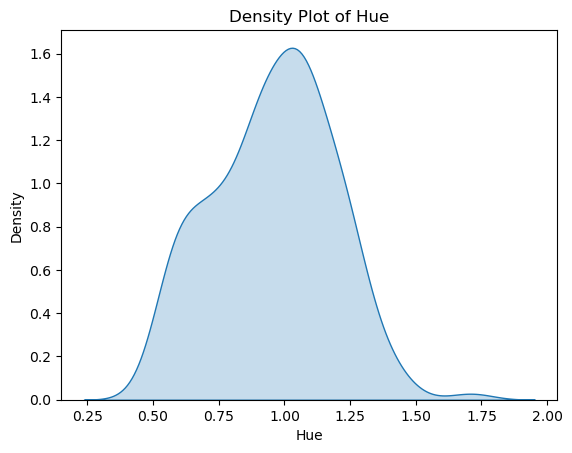

C:\Users\vijay\AppData\Local\Temp\ipykernel_9300\3802976700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


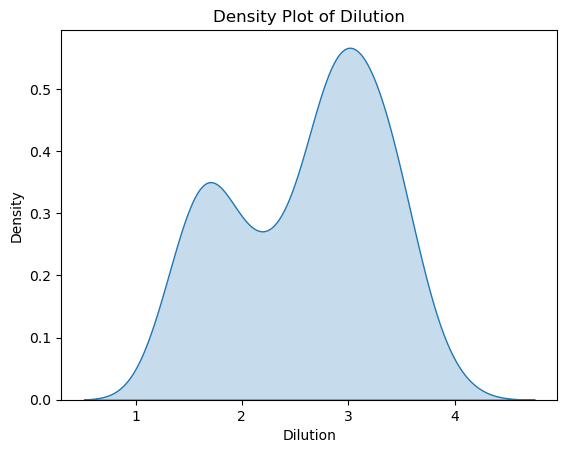

C:\Users\vijay\AppData\Local\Temp\ipykernel_9300\3802976700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


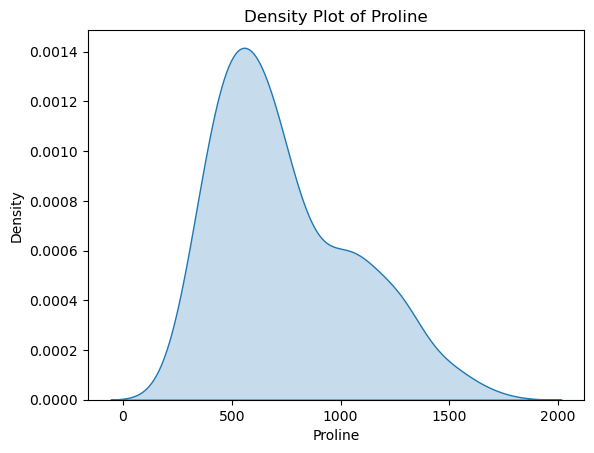

In [15]:
# Density plots for numerical columns
for column in numerical_columns:
    plt.figure()
    sns.kdeplot(df[column], shade=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


Histograms: These plots show the frequency distribution of the data. The kde=True option adds a kernel density estimate, which smooths out the distribution.

Box Plots: These plots show the median, quartiles, and outliers of the data, providing a summary of the data distribution.

Density Plots: These plots provide a smooth estimate of the data distribution, highlighting the shape and spread of the data.

Steps to Investigate Correlations
Calculate the Correlation Matrix: Use the corr method in Pandas to compute pairwise correlations of numerical columns.

Visualize the Correlation Matrix: Use a heatmap to visualize the correlations and easily identify strong relationships.

In [16]:
# Calculate the correlation matrix 
correlation_matrix = df.corr()
# Display the correlation matrix 
print(correlation_matrix)

                     Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Prolin

Visualize the Correlation Matrix

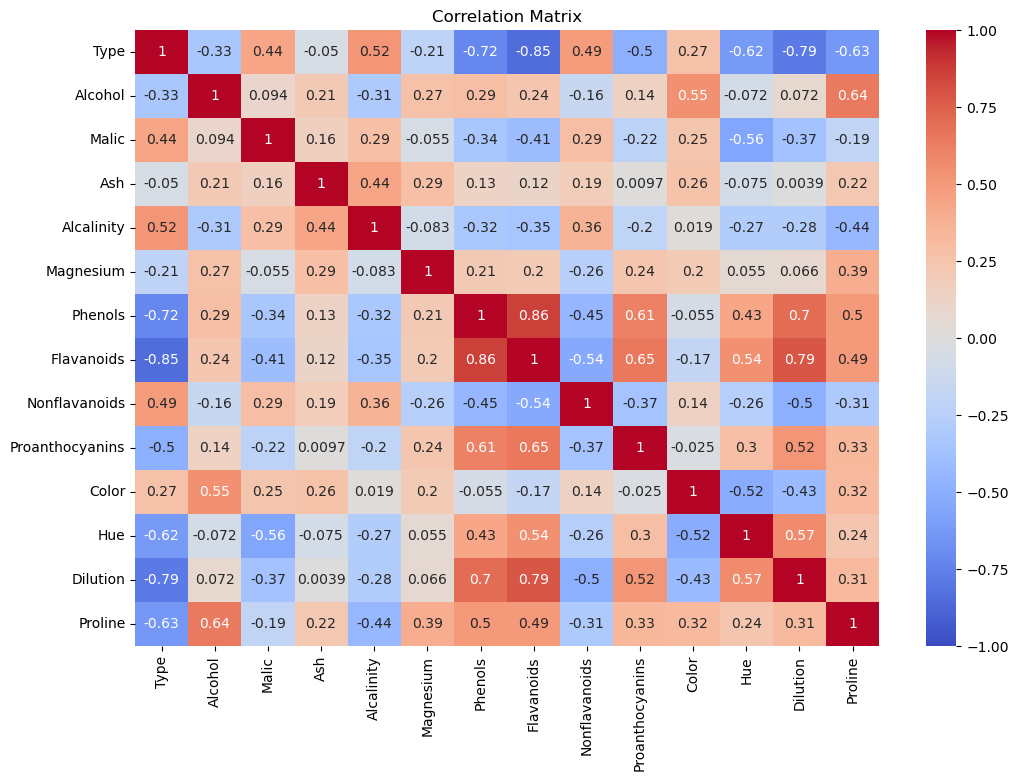

In [17]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


Explanation
Correlation Matrix: The .corr() method computes the Pearson correlation coefficient for each pair of numerical columns. Values range from -1 to 1, where:

1 indicates a perfect positive correlation.

-1 indicates a perfect negative correlation.

0 indicates no correlation.

Heatmap: The heatmap visualization makes it easier to see which features are strongly correlated. The annot=True parameter adds the correlation coefficient values to each cell in the heatmap.

Interpretation
Strong Positive Correlation: Features with a correlation close to 1 (e.g., 0.8 or higher) move in the same direction. If one feature increases, the other tends to increase as well.

Strong Negative Correlation: Features with a correlation close to -1 (e.g., -0.8 or lower) move in opposite directions. If one feature increases, the other tends to decrease.

Weak or No Correlation: Features with a correlation close to 0 do not have a linear relationship.

By examining the correlation matrix and heatmap, you can identify which features are strongly correlated and may need to be further investigated. Strongly correlated features can sometimes be redundant, so understanding these relationships is important for data preprocessing and feature selection.

## Task 2: Dimensionality Reduction with PCA:


Standardize the Features: We will standardize the numerical features to have a mean of 0 and a standard deviation of 1 using StandardScaler from scikit-learn.

Implement PCA: We will apply PCA to reduce the dimensionality of the dataset.

In [20]:
# Standardize the features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the standardized dataset
print(df.head())

       Type   Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0 -1.213944  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997   
1 -1.213944  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648   
2 -1.213944  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997   
3 -1.213944  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446   
4 -1.213944  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997   

   Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0    1.034819      -0.659563         1.224884  0.251717  0.362177  1.847920   
1    0.733629      -0.820719        -0.544721 -0.293321  0.406051  1.113449   
2    1.215533      -0.498407         2.135968  0.269020  0.318304  0.788587   
3    1.466525      -0.981875         1.032155  1.186068 -0.427544  1.184071   
4    0.663351       0.226796         0.401404 -0.319276  0.362177  0.449601   

    Proline  
0  1.013009  
1  0.965242  
2  1.395148  


In [22]:


# Implement PCA
pca = PCA(n_components=2)  # Change n_components based on how many principal components you want
principal_components = pca.fit_transform(df[numerical_columns])

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Display the explained variance ratio to understand the amount of variance captured by each component
print(pca.explained_variance_ratio_)

# Display the first few rows of the PCA DataFrame
print(pca_df.head())


[0.39542486 0.17836259]
   Principal Component 1  Principal Component 2
0              -3.522934              -1.453098
1              -2.528858               0.330019
2              -2.785029              -1.036936
3              -3.922588              -2.768210
4              -1.407511              -0.867773


Explanation
Standardize the Features:

We use StandardScaler to standardize the numerical columns so that each feature has a mean of 0 and a standard deviation of 1. This step ensures that all features contribute equally to the PCA.

Implement PCA:

PCA is performed to reduce the dimensionality of the dataset. We specify the number of principal components to keep with n_components. This example uses 2 principal components.

The explained_variance_ratio_ shows the amount of variance explained by each principal component, helping you understand how much information is retained.

#### Steps to Determine the Optimal Number of Principal Components
Fit PCA: Fit PCA to your data and calculate the explained variance.

Create a Scree Plot: Visualize the explained variance of each component.

Plot Cumulative Explained Variance: Show how the explained variance accumulates as more components are included.

In [24]:
# Fit PCA
pca = PCA() 
pca.fit(df[numerical_columns]) 
# Explained variance ratio 
explained_variance = pca.explained_variance_ratio_ 
# Display explained variance ratio 
print("Explained Variance Ratio:", explained_variance)



Explained Variance Ratio: [0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244 0.02103871 0.01873615 0.01613203 0.01205691
 0.00925458 0.00412945]


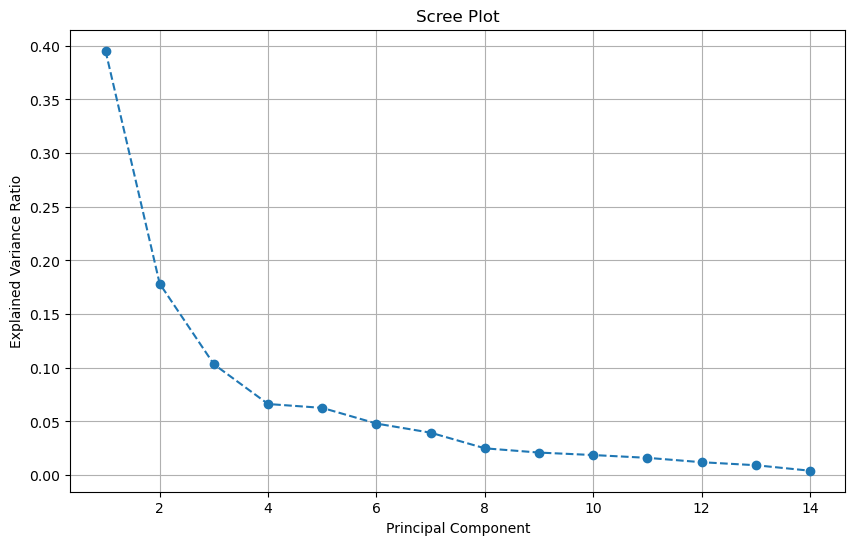

In [25]:
## Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


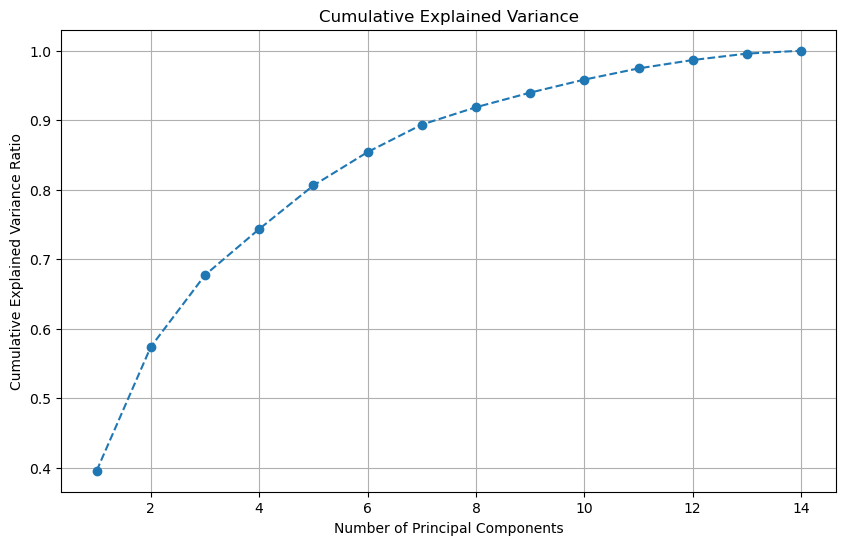

In [26]:
## Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


Interpretation
Scree Plot: The scree plot shows the explained variance ratio for each principal component. Look for an "elbow" point where the explained variance starts to level off. This indicates the point after which adding more components contributes very little additional variance.

Cumulative Explained Variance: This plot shows the cumulative explained variance ratio as more principal components are added. It helps determine the number of components needed to capture a desired amount of variance (e.g., 90% or 95%).

Summary
By using these plots, you can visually identify the optimal number of principal components that capture the majority of the variance in your dataset. This helps in reducing the dimensionality while retaining most of the information.

1.Transform the original dataset into the principal components.


Standardize the Features: Ensure that the numerical features are standardized.

Apply PCA: Use PCA to transform the dataset into the principal components.

Create a DataFrame for Principal Components: Store the principal components in a new DataFrame.

In [ ]:
# Create a DataFrame with the principal components pca_columns = [f'Principal Component {i+1}' for i in range(optimal_components)] pca_df = pd.DataFrame(data=principal_components, columns=pca_columns) # Display the first few rows of the PCA DataFrame print(pca_df.head())